<a href="https://colab.research.google.com/github/Ekta-kature/Capstone/blob/main/Convolution_neural_network_(CNN).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Covolution Neural Network**
A Convolutional Neural Network (CNN) is a type of deep learning algorithm specifically designed for processing structured grid data like images. CNNs are widely used in computer vision tasks such as image recognition, object detection, and image segmentation. Here's an overview of how CNNs work:
Key Components of CNNs
Convolutional Layers:

These layers apply a set of filters (also called kernels) to the input image.
Each filter slides (convolves) across the input image to produce feature maps.
The filters help detect patterns such as edges, textures, and shapes in different parts of the image.
The output of a convolutional layer is a set of feature maps.
Activation Function:

An activation function is applied to the feature maps to introduce non-linearity into the model.
The most common activation function used in CNNs is the Rectified Linear Unit (ReLU), defined as
𝑓
(
𝑥
)
=
max
⁡
(
0
,
𝑥
)


To understand this topic explicitly lets take an example using MNIST datset, which contains handwritten digits. The primary goal is to classify images of handwritten digits (0-9) correctly. Here's a detailed overview of what this example entails:

## **Objective:-**
The main objective is to build a neural network model that can recognize handwritten digits from the MNIST dataset with high accuracy. The process involves several steps, including data preprocessing, model definition, training, and evaluation.

### 1.Install necessary libraries

In [ ]:
!pip install torchviz

  Preparing metadata (setup.py) ... done
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
     ━━━━━━━

### 2. Importing Libraries

**torch and torch.nn** are PyTorch libraries for building and training neural networks.

**torch.optim** provides various optimization algorithms.

**torchvision** is used for computer vision tasks, containing datasets, models, and transforms.

**transforms** helps in pre-processing and augmenting the data.

**DataLoader** is used to load data from a dataset.

**torch.nn.functional** contains functions for various operations like activation functions and loss functions.

**matplotlib.pyplot and numpy** are used for plotting and numerical operations respectively.

**torchviz.make_dot** is used for visualizing the model architecture.

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import torch.nn.functional as F  # Add this line
import matplotlib.pyplot as plt
import numpy as np
from torchviz import make_dot

### 2.Define Transformations

In [ ]:
# Define transformations for the data
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

## 3.Load the Datasets

In [ ]:
# Load the datasets
train_set = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_set = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

# Create data loaders
train_loader = DataLoader(train_set, batch_size=32, shuffle=True)
test_loader = DataLoader(test_set, batch_size=32, shuffle=False)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9912422/9912422 [00:01<00:00, 5232999.65it/s]


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28881/28881 [00:00<00:00, 157270.68it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1648877/1648877 [00:01<00:00, 1486631.16it/s]


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4542/4542 [00:00<00:00, 8902116.25it/s]

Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



## 5.Define the CNN model


---



In [ ]:
# Define the CNN model
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.fc1 = nn.Linear(64 * 7 * 7, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 64 * 7 * 7)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return x

## 6. Instantiate Model, Loss Function, and Optimizer

In [ ]:
model = CNN()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

## 7.Train the model

In [ ]:
# Train the model
for epoch in range(10):  # number of epochs
    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        inputs, labels = data

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()
        if i % 200 == 199:  # print every 200 mini-batches
            print(f'[Epoch {epoch + 1}, Batch {i + 1}] loss: {running_loss / 200:.3f}')
            running_loss = 0.0

print('Finished Training')

[Epoch 1, Batch 200] loss: 0.461
[Epoch 1, Batch 400] loss: 0.138
[Epoch 1, Batch 600] loss: 0.095
[Epoch 1, Batch 800] loss: 0.090
[Epoch 1, Batch 1000] loss: 0.081
[Epoch 1, Batch 1200] loss: 0.064
[Epoch 1, Batch 1400] loss: 0.059
[Epoch 1, Batch 1600] loss: 0.062
[Epoch 1, Batch 1800] loss: 0.054
[Epoch 2, Batch 200] loss: 0.047
[Epoch 2, Batch 400] loss: 0.041
[Epoch 2, Batch 600] loss: 0.047
[Epoch 2, Batch 800] loss: 0.042
[Epoch 2, Batch 1000] loss: 0.036
[Epoch 2, Batch 1200] loss: 0.038
[Epoch 2, Batch 1400] loss: 0.038
[Epoch 2, Batch 1600] loss: 0.043
[Epoch 2, Batch 1800] loss: 0.038
[Epoch 3, Batch 200] loss: 0.023
[Epoch 3, Batch 400] loss: 0.019
[Epoch 3, Batch 600] loss: 0.034
[Epoch 3, Batch 800] loss: 0.024
[Epoch 3, Batch 1000] loss: 0.032
[Epoch 3, Batch 1200] loss: 0.032
[Epoch 3, Batch 1400] loss: 0.030
[Epoch 3, Batch 1600] loss: 0.025
[Epoch 3, Batch 1800] loss: 0.032
[Epoch 4, Batch 200] loss: 0.016
[Epoch 4, Batch 400] loss: 0.017
[Epoch 4, Batch 600] loss: 0

## 8.Evaluate the Model

In [ ]:
correct = 0
total = 0
with torch.no_grad():
    for data in test_loader:
        images, labels = data
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct / total:.2f}%')


Accuracy of the network on the 10000 test images: 99.24%


## 9.Visualization

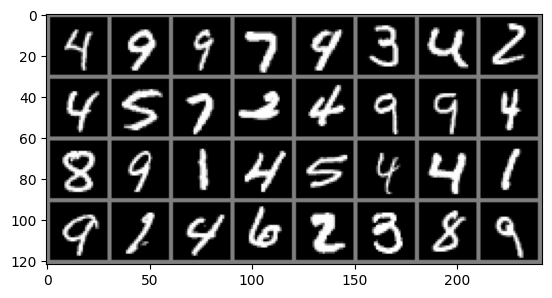

4 9 9 7


'cnn_model.png'

In [ ]:
# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Get some random training images
dataiter = iter(train_loader)
images, labels = next(dataiter)

# Show images
imshow(torchvision.utils.make_grid(images))
# Print labels
print(' '.join(f'{labels[j]}' for j in range(4)))

# Visualize the model architecture
sample_input = torch.randn(1, 1, 28, 28)
output = model(sample_input)
dot = make_dot(output, params=dict(model.named_parameters()))
dot.render("cnn_model", format="png")
